Campaigns data: (30200, 3)
Customers data: (10000, 12)
Merged dataset shape: (30200, 14)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7034
           1       1.00      0.99      0.99       516

    accuracy                           1.00      7550
   macro avg       1.00      0.99      1.00      7550
weighted avg       1.00      1.00      1.00      7550

ROC-AUC Score: 0.9999955917327356


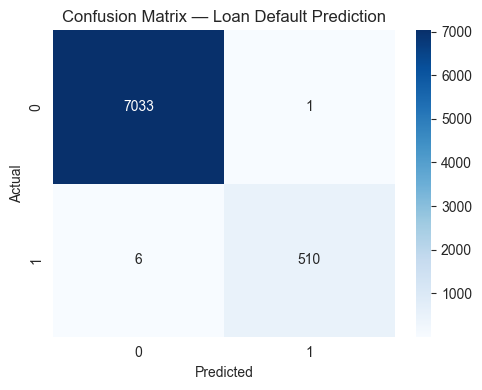

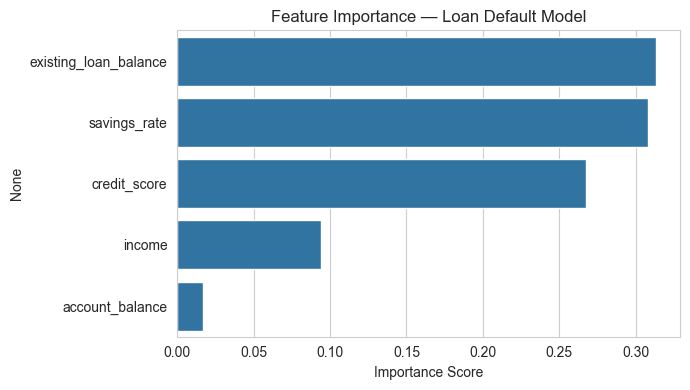

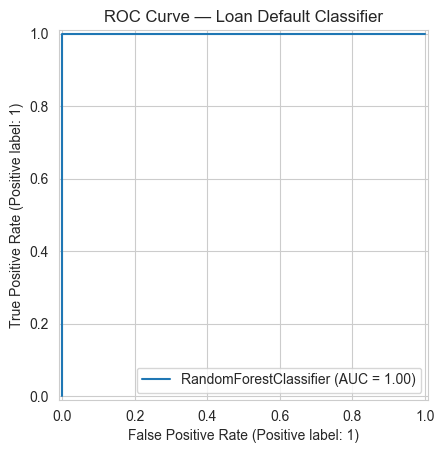

In [1]:
# ---------------- Imports ----------------
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# ---------------- Load Data ----------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
campaign_path = os.path.join(DOWNLOADS_DIR, "campaigns_hma_10000_india.csv")
customer_path = os.path.join(DOWNLOADS_DIR, "customers_hma_10000_india.csv")

campaigns = pd.read_csv(campaign_path)
customers = pd.read_csv(customer_path)

print(f"Campaigns data: {campaigns.shape}")
print(f"Customers data: {customers.shape}")

# ---------------- Merge (if applicable) ----------------
# Assuming campaigns table contains `customer_id`
df = campaigns.merge(customers, on='customer_id', how='left')
print(f"Merged dataset shape: {df.shape}")

# ---------------- Feature Engineering ----------------
# Create synthetic "loan_default" target variable
# Customers with low credit score, high loan balance, and low savings_rate more likely to default
np.random.seed(42)
df['loan_default'] = np.where(
    (df['credit_score'] < 600) &
    (df['existing_loan_balance'] > df['income'] * 0.5) &
    (df['savings_rate'] < 0.2),
    1, 0
)

# Select relevant features for model
features = [
    'income', 'credit_score', 'savings_rate',
    'existing_loan_balance', 'account_balance'
]

X = df[features]
y = df['loan_default']

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ---------------- Scale Features ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Train Model ----------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------------- Evaluate ----------------
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ---------------- Confusion Matrix ----------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Loan Default Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------- Feature Importance ----------------
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance — Loan Default Model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ---------------- ROC Curve ----------------
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve — Loan Default Classifier")
plt.show()

In [3]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 9.2 MB/s eta 0:00:07
   - -------------------------------------- 2.6/56.8 MB 7.4 MB/s eta 0:00:08
   --- ------------------------------------ 4.5/56.8 MB 8.2 MB/s eta 0:00:07
   ---- ----------------------------------- 6.3/56.8 MB 8.2 MB/s eta 0:00:07
   ----- ---------------------------------- 8.1/56.8 MB 8.4 MB/s eta 0:00:06
   ------- -------------------------------- 10.0/56.8 MB 8.4 MB/s eta 0:00:06
   -------- ------------------------------- 11.5/56.8 MB 8.3 MB/s eta 0:00:06
   --------- ------------------------------ 13.4/56.8 MB 8.4 MB/s eta 0:00:06
   ---------- ----------------------------- 14.7/56.8 MB 8.3 MB/s eta 0:00:06
   ----------- ---------------------------- 16.3/56.8 MB 8.2 MB/s eta 0:00:05
   ------------ --------------------------- 17.8/56.8 MB 8.1 MB/s eta 0:00:05
   -------------- ------------------------- 19.9/56.8 MB 8.2 MB/s eta 0:00:05


📊 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7034
           1       0.78      0.66      0.72       516

    accuracy                           0.96      7550
   macro avg       0.88      0.83      0.85      7550
weighted avg       0.96      0.96      0.96      7550

ROC-AUC: 0.9820

📊 Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7034
           1       1.00      0.99      0.99       516

    accuracy                           1.00      7550
   macro avg       1.00      0.99      1.00      7550
weighted avg       1.00      1.00      1.00      7550

ROC-AUC: 1.0000

📊 XGBoost Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7034
           1       1.00      0.99      0.99       516

    accuracy                           1.00      7550
   macro avg       1.

C:\Users\user\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:55:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\AppData\Local\Temp\ipykernel_25892\2974410773.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ROC-AUC', data=results_df, palette='coolwarm')



Model Comparison Summary:
                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.964503  0.981971
1        Random Forest  0.999073  0.999996
2              XGBoost  0.998940  0.999982


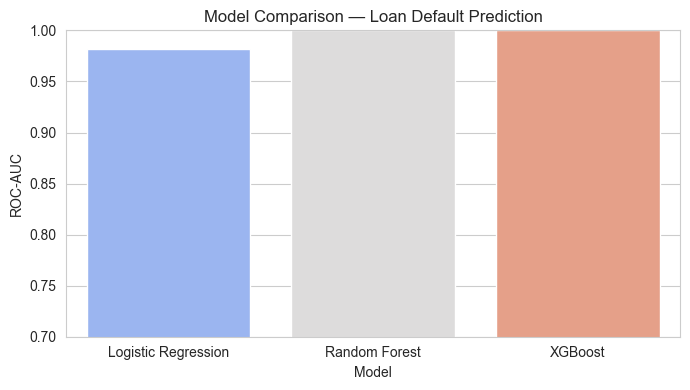

In [4]:
# ---------------- Imports ----------------
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Load Data ----------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
campaign_path = os.path.join(DOWNLOADS_DIR, "campaigns_hma_10000_india.csv")
customer_path = os.path.join(DOWNLOADS_DIR, "customers_hma_10000_india.csv")

campaigns = pd.read_csv(campaign_path)
customers = pd.read_csv(customer_path)

# Merge on customer_id
df = campaigns.merge(customers, on='customer_id', how='left')

# ---------------- Feature Engineering ----------------
np.random.seed(42)
df['loan_default'] = np.where(
    (df['credit_score'] < 600) &
    (df['existing_loan_balance'] > df['income'] * 0.5) &
    (df['savings_rate'] < 0.2),
    1, 0
)

features = [
    'income', 'credit_score', 'savings_rate',
    'existing_loan_balance', 'account_balance'
]

X = df[features]
y = df['loan_default']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Models ----------------
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

# ---------------- Train & Evaluate ----------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = model.score(X_test_scaled, y_test)
    roc_auc = roc_auc_score(y_test, y_prob)
    results.append({"Model": name, "Accuracy": acc, "ROC-AUC": roc_auc})

    print(f"\n📊 {name} Results")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc:.4f}")

# ---------------- Compare Performance ----------------
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df)

# Plot comparison
plt.figure(figsize=(7, 4))
sns.barplot(x='Model', y='ROC-AUC', data=results_df, palette='coolwarm')
plt.title("Model Comparison — Loan Default Prediction")
plt.ylim(0.7, 1)
plt.tight_layout()
plt.show()